# Assignment-2 : Capital Asset Pricing Model
1. Due date: Oct. 3
2. Kratika Aggarwal Fall'22

In this assignment, you are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, you will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

You can pick any two stocks and market index other than those we have in the class.

This assignment will be divided into 4 milestones.

1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


In [1]:
# codes here

# Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

### Importing Important Libraries: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
import statsmodels.api as sm
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

In the analysis, I have chosen Advanced Micro Devices(AMD) & NVDIA(NVDA) on the NASDAQ 100 Index.

In [3]:
stocks = ['AMD', 'NVDA','^NDX']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 4, 1)
stock_price = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  3 of 3 completed


In [4]:
stock_price.head()

Adj Close                                Close              \
                  AMD        NVDA          ^NDX        AMD        NVDA   
Date                                                                     
2021-01-04  92.300003  130.931671  12694.660156  92.300003  131.134995   
2021-01-05  92.769997  133.839615  12802.379883  92.769997  134.047501   
2021-01-06  90.330002  125.949394  12623.349609  90.330002  126.144997   
2021-01-07  95.160004  133.233063  12939.570312  95.160004  133.440002   
2021-01-08  94.580002  132.561615  13105.200195  94.580002  132.767502   

                               High                                  Low  \
                    ^NDX        AMD        NVDA          ^NDX        AMD   
Date                                                                       
2021-01-04  12694.660156  96.059998  136.524994  12950.219727  90.919998   
2021-01-05  12802.379883  93.209999  134.434998  12809.669922  91.410004   
2021-01-06  12623.349609  92.279999  132.449997  12803.290039  89.459999   
2021-01-07  12939.570312  95.510002  133.777496  12966.679688  91.199997   
2021-01-08  13105.200195  96.400002  134.210007  13113.089844  93.269997   

                                           Open                            \
                  NVDA          ^NDX        AMD        NVDA          ^NDX   
Date                                                                        
2021-01-04  129.625000  12537.419922  92.110001  131.042496  12950.219727   
2021-01-05  130.869995  12663.129883  92.099998  130.997498  12663.129883   
2021-01-06  125.860001  12569.419922  91.620003  132.225006  12601.259766   
2021-01-07  128.865005  12744.820312  91.330002  129.675003  12745.410156   
2021-01-08  130.419998  12939.730469  95.980003  133.625000  13037.240234   

              Volume                        
                 AMD      NVDA        ^NDX  
Date                                        
2021-01-04  51802600  56064000  6546740000  
2021-01-05  34208000  32276000  6904420000  
2021-01-06  51911700  58042400  7648340000  
2021-01-07  42897200  46148000  6777010000  
2021-01-08  39816400  29252800  7223660000

In [5]:
stock_price=stock_price['Close']
stock_price.head()

,AMD,NVDA,^NDX
Date,,,
2021-01-04,92.300003,131.134995,12694.660156
2021-01-05,92.769997,134.047501,12802.379883
2021-01-06,90.330002,126.144997,12623.349609
2021-01-07,95.160004,133.440002,12939.570312
2021-01-08,94.580002,132.767502,13105.200195


#### Renaming ^NDX column for convienence

In [6]:
stock_price = stock_price.rename({'^NDX' :'NDX'},  axis='columns')
stock_price.head()

,AMD,NVDA,NDX
Date,,,
2021-01-04,92.300003,131.134995,12694.660156
2021-01-05,92.769997,134.047501,12802.379883
2021-01-06,90.330002,126.144997,12623.349609
2021-01-07,95.160004,133.440002,12939.570312
2021-01-08,94.580002,132.767502,13105.200195


Here, there are two stock indexes(AMD,NVDA) and one market index(NDX).

In [7]:
stock_price.describe()

,AMD,NVDA,NDX
count,61.000000,61.000000,61.000000
mean,86.102131,134.407870,13124.912350
std,6.181423,7.734565,353.459364
min,73.959999,115.932503,12299.080078
25%,80.860001,129.177505,12892.089844
50%,87.660004,133.412506,13082.540039
75%,91.459999,137.125000,13402.370117
max,97.250000,153.302505,13807.700195


Initial observation tells us that the price level and volatility (represented by standard deviation) of NDX(market)
is quite different from the rest of the stocks.

### Risk-free rate = using the interest rate on a three-month U.S. Treasury bill as a useful proxy

In [8]:
!pip3 install fredapi

In [14]:
from fredapi import Fred
fred = Fred(api_key='791c937c34aeec18755ee76dfa15f282')#  my API key

In [15]:
fred.search('DGS3MO')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
DGS3MO,Daily,D,DGS3MO,2022-09-30 15:20:04-05:00,For further information regarding treasury con...,2022-09-29,1981-09-01,72,2022-10-03,2022-10-03,Not Seasonally Adjusted,NSA,Market Yield on U.S. Treasury Securities at 3-...,Percent,%


In [16]:
risk_free = fred.get_series('DGS3MO')
risk_free

1981-09-01    17.01
1981-09-02    16.65
1981-09-03    16.96
1981-09-04    16.64
1981-09-07      NaN
              ...  
2022-09-23     3.24
2022-09-26     3.39
2022-09-27     3.35
2022-09-28     3.40
2022-09-29     3.36
Length: 10718, dtype: float64

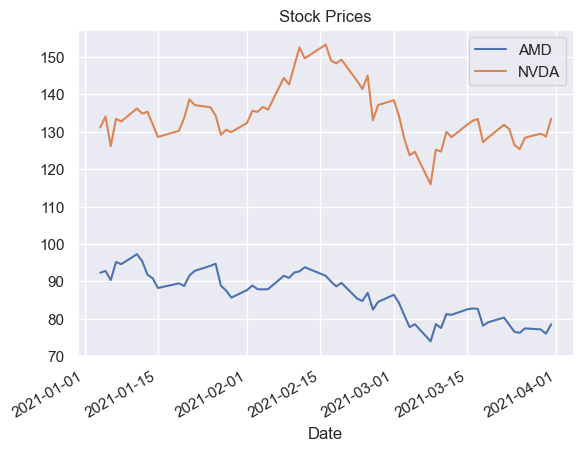

In [17]:
stock_price.loc[:,['AMD', 'NVDA']].plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

The Stock price for (NVDA) has had it's ups(Major spike in February 2021) and downs(Major dip in Mid March 2021) while Advanced Micro Devices(AMD) has gradually gone downwards.

In [18]:
stock_price.corr()

,AMD,NVDA,NDX
AMD,1.000000,0.600129,0.537636
NVDA,0.600129,1.000000,0.861234
NDX,0.537636,0.861234,1.000000


The Correlation Matrix shows that there is a high correlation between NDX and NVDA. 

### Calculating the Return

In [19]:
returns = stock_price.pct_change()
returns.dropna(inplace=True)

### Converting 3 Month(90 Days) Risk Free Rate into Daily Rate

In [20]:
risk_free = risk_free['2021-01-01':'2021-04-01']
risk_free = risk_free/90 
risk_free.dropna(inplace=True)
risk_free

2021-01-04    0.001000
2021-01-05    0.001000
2021-01-06    0.001000
2021-01-07    0.001000
2021-01-08    0.000889
                ...   
2021-03-26    0.000222
2021-03-29    0.000333
2021-03-30    0.000222
2021-03-31    0.000333
2021-04-01    0.000222
Length: 62, dtype: float64

### Calculating Excess Return

*Formula :* Excess Return = Stock Return - Risk Free Rate

In [21]:
for i in returns.columns:
    returns[f'excess_return_{i}'] = returns[i] - risk_free
returns.head()

,AMD,NVDA,NDX,excess_return_AMD,excess_return_NVDA,excess_return_NDX
Date,,,,,,
2021-01-05,0.005092,0.022210,0.008485,0.004092,0.021210,0.007485
2021-01-06,-0.026302,-0.058953,-0.013984,-0.027302,-0.059953,-0.014984
2021-01-07,0.053471,0.057830,0.025050,0.052471,0.056830,0.024050
2021-01-08,-0.006095,-0.005040,0.012800,-0.006984,-0.005929,0.011911
2021-01-11,0.028230,0.025966,-0.015468,0.027341,0.025078,-0.016357


### Running CAPM

In [22]:
y_amd = returns['excess_return_AMD']
X = returns['excess_return_NDX']

In [23]:
X = sm.add_constant(X, prepend=False)
capm_amd = sm.OLS(y_amd, X)
capm_result_amd = capm_amd.fit()

In [24]:
capm_result_amd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_AMD   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           3.52e-15
Time:                        10:09:26   Log-Likelihood:                 163.89
No. Observations:                  60   AIC:                            -323.8
Df Residuals:                      58   BIC:                            -319.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
excess_return_NDX     1.3989      0.132     10.593      0.000       1.135       1.663
const                -0.0030      0.002     -1.448      0.153      -0.007       0.001
==============================================================================
Omnibus:                        6.682   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                8.182
Skew:                           0.376   Prob(JB):                       0.0167
Kurtosis:                       4.645   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations: 
  1. As P>|t| is 0.000. Hence, we reject Null hypothesis implying that there is a statistically significant relationship between excess return of NASDAQ and AMD.
  2. Excess Return of NASDAQ 100 Index accounts for 65.9% of the changes in the stock(AMD).
  3. Since Beta>1, Hence AMD is more risky than market benchmark(NASDAQ 100 Index) return. Econometrically if    excess return of NASDAQ goes up by +1 unit, then excess return of NDX goes up by 1.39. 

In [25]:
y_nvda = returns['excess_return_NVDA']
X = returns['excess_return_NDX']

In [26]:
X = sm.add_constant(X, prepend=False)
capm_nvda = sm.OLS(y_nvda, X)
capm_result_nvda = capm_nvda.fit()

In [27]:
capm_result_nvda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_NVDA   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     109.3
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           5.84e-15
Time:                        10:09:35   Log-Likelihood:                 155.29
No. Observations:                  60   AIC:                            -306.6
Df Residuals:                      58   BIC:                            -302.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
excess_return_NDX     1.5934      0.152     10.454      0.000       1.288       1.898
const              9.395e-05      0.002      0.039      0.969      -0.005       0.005
==============================================================================
Omnibus:                        6.604   Durbin-Watson:                   2.698
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.702
Skew:                           0.644   Prob(JB):                       0.0578
Kurtosis:                       3.790   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations: 
  1. As P>|t| is 0.000. Hence, we reject the null hypothesis implying that there is a relationship between the excess return of NASDAQ ane NVDA.
  2. Excess Return of NASDAQ 100 Index accounts for 65.3% of the changes in the stock(NVDA).
  3. Since Beta>1, Hence NVDA is way more riskier than market benchmark(NASDAQ 100 Index).Econometrically if excess return of NASDAQ goes up by +1 unit, then excess return of NDX goes up by 1.59. 

### Compare the Model : Security Market Line(SML)

In [28]:
betas = [capm_result_amd.params[0],
         capm_result_nvda.params[0]]
betas

[1.3988831454426278, 1.593393338772548]

In [29]:
def SML(rf, ret, beta):
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('SML')
    plt.plot(1, ret, 'ro')

In [30]:
rf = risk_free.mean()
rm = returns['NDX'].mean()

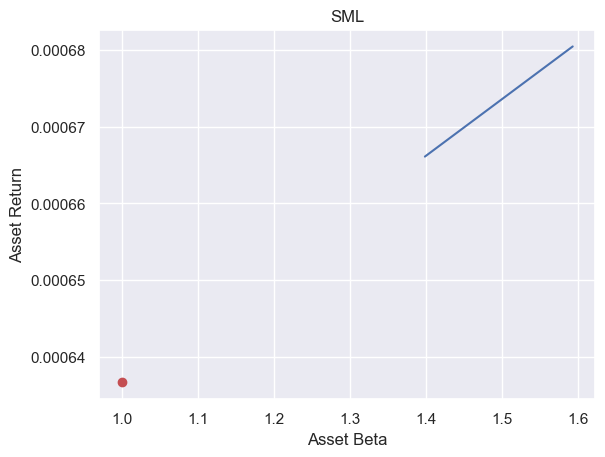

In [35]:
SML(rf, rm, betas)

This is an ideal case scenario where asset beta =1. ie. we have accurately mimicked the market. 

Now taking the return expectations for:

* AMD as 0.0637% 
* NVDA as 0.0637%

In [52]:
ret_exp = [0.0637, 0.0637]
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all = pd.concat([df_betas, df_ret_exp], axis=1)
df_all.columns = ['betas', 'ret_exp']
df_all.index = returns.columns[:2]
df_all

,betas,ret_exp
AMD,1.398883,0.0637
NVDA,1.593393,0.0637


In [53]:
def over_under_val(rf, rm, stock):
    x = rf + (rm - rf) * df_all['betas'].loc[stock]# required rate of return(equilibrium)
    y = df_all['ret_exp'].loc[stock] # expectations
    if x < y:
        print('The stock is underpriced')
    elif x > y:
        print('The stock is overpriced')
    else:
        print('The stock is fairly priced')     
    

In [54]:
over_under_val(rf, rm, 'AMD')

The stock is underpriced


In [55]:
over_under_val(rf, rm, 'NVDA')

The stock is underpriced


As both the stocks 'AMD' & 'NVDA' are underpriced. Hence investors should take advantage of the situation and invest their money.

### Evaluating Risk to Return Relationship: Sharpe Ratio

Assuming that the portfolio is not well diversified, hence we take into account the:
Total Risk(Unsystematic Risk+Systematic Risk).

In [56]:
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = returns.iloc[:, j].mean() - rf / np.std(returns.iloc[:, j])
    return sharpe_ratios

In [57]:
stocks = returns.columns[:2]
sharpe_ratios = sharpe(stocks, rf, 3)
sharpe_ratios

{'AMD': -0.023159230093350063, 'NVDA': -0.01743304175890372}

As the higher the sharpe ratio is, the better it is, hence NVDA offers the best risk to return relationship.

### Evaluating Risk to Return Relationship: Treynor Ratio

In [58]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, j in enumerate(stocks):
        treynor_ratios[j] = returns.iloc[:, i].mean() - rf / df_all['betas'][j]
    return treynor_ratios

In [59]:
treynor_ratios = treynor(stocks, rf, 2)
treynor_ratios

{'AMD': -0.0027311290148181663, 'NVDA': 0.0004222281808269202}

The higher the Treynor Ratio the better. Hence it would be a wiser decision to invest in NVDA.